In [1]:
from functions import *
import tensorflow as tf


Using TensorFlow backend.


In [2]:
# =========== load dataset =========== #
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# path to save predictions after each type of training
savepath = './results/'
# list to store each training history
histories = []
# list to store name of training
names = []


In [3]:
# =========== reshape dataset to the shape suitable for training =========== #
# shapes before reshaping
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# reshape dataset
dataset = reshape_data(X_train, y_train, X_test, y_test, savepath)
# shapes after reshaping
X_train = dataset['X_train'].copy()
X_test = dataset['X_test'].copy()
y_train = dataset['y_train'].copy()
y_test = dataset['y_test'].copy()
print(X_train.shape, 
      y_train.shape,
      X_test.shape,
      y_test.shape,)


(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

(60000, 28, 28, 1)

(60000, 10)

(10000, 28, 28, 1)

(10000, 10)

In [4]:
# =========== train, predict, save and store =========== #
# train model, get and save predictions to the savepath folder
# return learning history and name of the "trained dataset"
cur_history, name = train_predict(dataset, savepath, 'MNIST', verb=0)
# store learning history to the list
histories.append(cur_history)
# store name to the list 
names.append(name)


MNIST accurancy: 0.9443

In [5]:
# =========== extract features from original images =========== #
feat_train_data, feat_test_data = extr_feat(dataset)


D:\Deep_Learning\MyProjects\CNN_CV\functions.py:148: RuntimeWarning: invalid value encountered in true_divide
  feat = feat_std/feat_mean


D:\Deep_Learning\MyProjects\CNN_CV\functions.py:157: RuntimeWarning: invalid value encountered in true_divide
  feat = np.std(get_diag, axis=2).T/np.mean(get_diag, axis=2).T


D:\Deep_Learning\MyProjects\CNN_CV\functions.py:159: RuntimeWarning: invalid value encountered in true_divide
  feat_rot = np.std(get_diag_rot, axis=2).T/np.mean(get_diag_rot, axis=2).T


D:\Deep_Learning\MyProjects\CNN_CV\functions.py:162: RuntimeWarning: invalid value encountered in true_divide
  (np.mean(get_diag, axis=2).T+np.mean(get_diag_rot, axis=2).T)


D:\Deep_Learning\MyProjects\CNN_CV\functions.py:167: RuntimeWarning: invalid value encountered in true_divide
  feat = (np.std(data, axis=0)+np.std(data, axis=1))/(np.mean(data, axis=0)+np.mean(data, axis=1))


D:\Deep_Learning\MyProjects\CNN_CV\functions.py:190: RuntimeWarning: invalid value encountered in true_divide
  feat = (np.std(np.diagonal(data, offset=-i), axis=1) / np.mean(np.diagonal(data, offset=-i), axis=1)).reshape(-1, 1)


D:\Deep_Learning\MyProjects\CNN_CV\functions.py:193: RuntimeWarning: invalid value encountered in true_divide
  feat = (np.std(np.diagonal(data, offset=i), axis=1) / np.mean(np.diagonal(data, offset=i), axis=1)).reshape(-1, 1)


Total Non NaN values: 12233776

Total NaN values: 6224

(60000, 192)

Total Non NaN values: 2039040

Total NaN values: 960

(10000, 192)

In [10]:
# =========== reshape features to image shape and concatenate with them =========== #
# reshape to image shape
X_train_feat, X_test_feat = reshape_as_orig(feat_train_data, 
                                            feat_test_data, 
                                            dataset)
print(X_train_feat.shape)
print(X_train.shape)
# stack new features array to original image dataset as additional "depth" layer 
X_train_2 = np.concatenate([X_train, X_train_feat], axis=-1)
X_test_2 = np.concatenate([X_test, X_test_feat], axis=-1)
print(X_train_2.shape)


(60000, 28, 28, 1)

(60000, 28, 28, 1)

(60000, 28, 28, 2)

In [8]:
# ====== train miniVGG with original data concatenated with new features ====== #
# update dataset to train with VGG model
dataset['X_train'] = X_train_2
dataset['X_test'] = X_test_2
dataset['train_shape'][-1] = dataset['train_shape'][-1] + 1
dataset['test_shape'][-1] = dataset['test_shape'][-1] + 1

# train, predict, save results
cur_history, name = train_predict(dataset, savepath, 'MNIST_feat', verb=0)
histories.append(cur_history)
names.append(name)


MNIST_feat accurancy: 0.9438

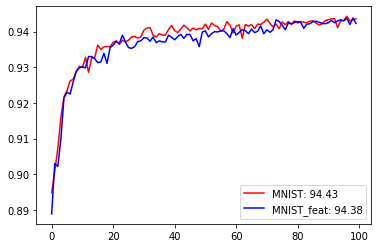

In [26]:
# ====== plot training histories, read predictions from csv and store them to the list ====== #
colors = ['r', 'b']
for n in range(len(names)):    
    plt.plot(np.arange(len(histories[n])),
             histories[n],
             c=colors[n],
             label=names[n] + ': ' + str(np.round(np.max(histories[n])*100, 2)))
plt.legend()


In [19]:
# ====== read predictions, average them and get better accuracy ====== #
predictions = []
# read predictions from csv files and store them to "predictions" list
for n in range(len(names)):
    predictions.append(pd.read_csv(savepath + 'cur_pred_'
                                   + str(names[n]) + '.csv').values)

# average to predictions
average_pred = (predictions[0] + predictions[1])/2
# find the most probable class for each image
average_pred = np.argmax(average_pred, axis=1)
# calculate accuracy for averaged predictions
acc = accuracy_score(average_pred, y_test)
print(acc)


0.9469